## Joplin Example Notebook

- Tornadoes occur at a high frequency in the United States compared with other natural hazards such as earthquakes and tsunamis but have a substantially smaller footprint. Even a single high-intensity tornado can result in high casualty rates and catastrophic economic and social loss. 

- The city of Joplin, Missouri, USA, which was hit by an EF-5 tornado on May 22, 2011, was simulated by IN-CORE which is a new computational environment.

- The initial damage prediction utilized the tornado path, tornado fragility curves representative of a 19-archetype building dataset, and EPN datasets. 

- The functionality of the infrastructure was lined with a computable general equilibrium economics model that predicts the effect of the damage on specific community resilience metrics in economic terms, and a population dislocation model that provides resilience metrics related to socio-demographics.

- This example demonstrates how users interact with IN-CORE platform.

### 1. Hazard, Data, and Fragility

This section introduces the input of infrastructure damage analysis including the tornado path, building dataset, and tornado fragility curves.

In [1]:
from pathlib import Path, PureWindowsPath

import matplotlib.pyplot as plt  # This cell is used to import python libraries to visualize the analysis outputs.
import matplotlib.image as mpimg
import geopandas as gpd
import pandas as pd
import numpy as np
import contextily as ctx

#### 1(a). Tornado Path

This figure shows the 2011 Joplin tornado path with EF zones. The tornado path represents the wind speed within the vortex that was estimated to have EF5 wind speeds of more than 200 mph, reducing to EF4 wind speeds as the areas move outward from the vortex, and eventually reaching EF1 zone. (Attary et al. 2018)

C:\Users\lisawang\.conda\envs\pyincoreEnv\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


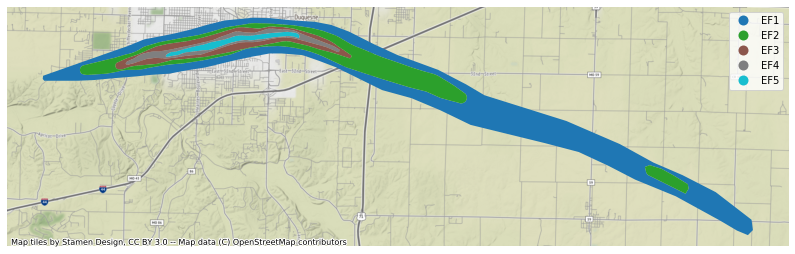

In [22]:
path = PureWindowsPath('5d07cbe9b9219c065b819103\joplin_path_wgs84.shp')
shp_path = Path(path)
tornado = gpd.read_file(shp_path)
tornado = tornado.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(14, 6))
tornado.plot(column='ef_rating', categorical=True,legend=True,ax=ax)  
ctx.add_basemap(ax)
ax.set_axis_off()

plt.show()

#### 1(b). Building Archetypes

The 19 archetype buildings are used herein to present the Joplin community. The selected building archetypes consider building characteristics such as footprint area, roof structure, number of stories, and so on. (Attary et al. 2018, Memari et al. 2018)

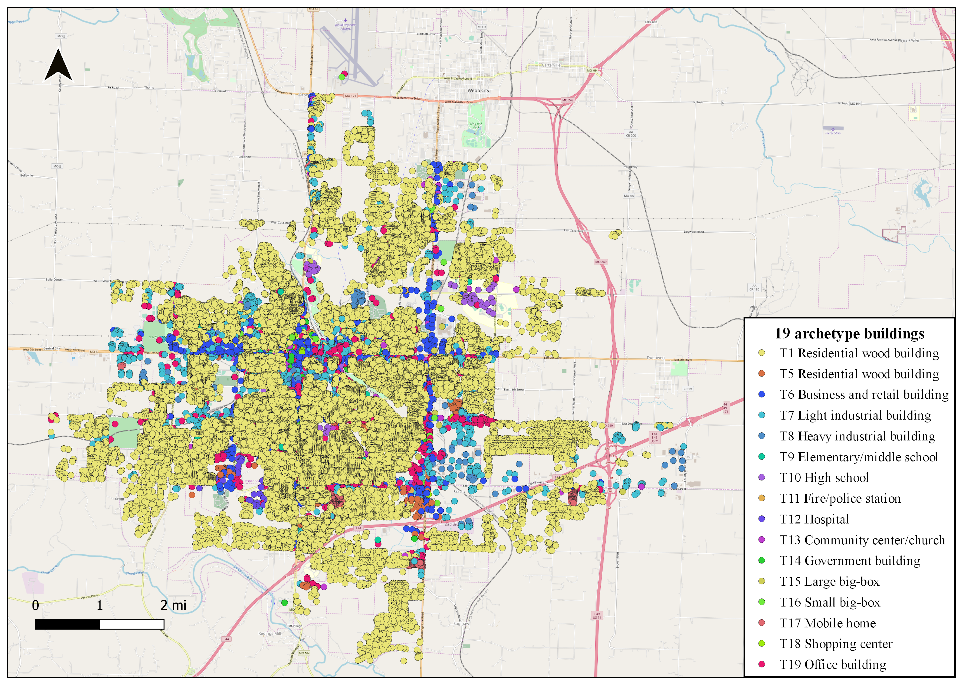

In [3]:
img = mpimg.imread('Images/Joplin building archetypes.png')  # The layout of the building dataset shown in GIS software.
plt.rcParams['figure.figsize'] = [17, 15]
plt.axis('off')
plt.imshow(img)

C:\Users\lisawang\.conda\envs\pyincoreEnv\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


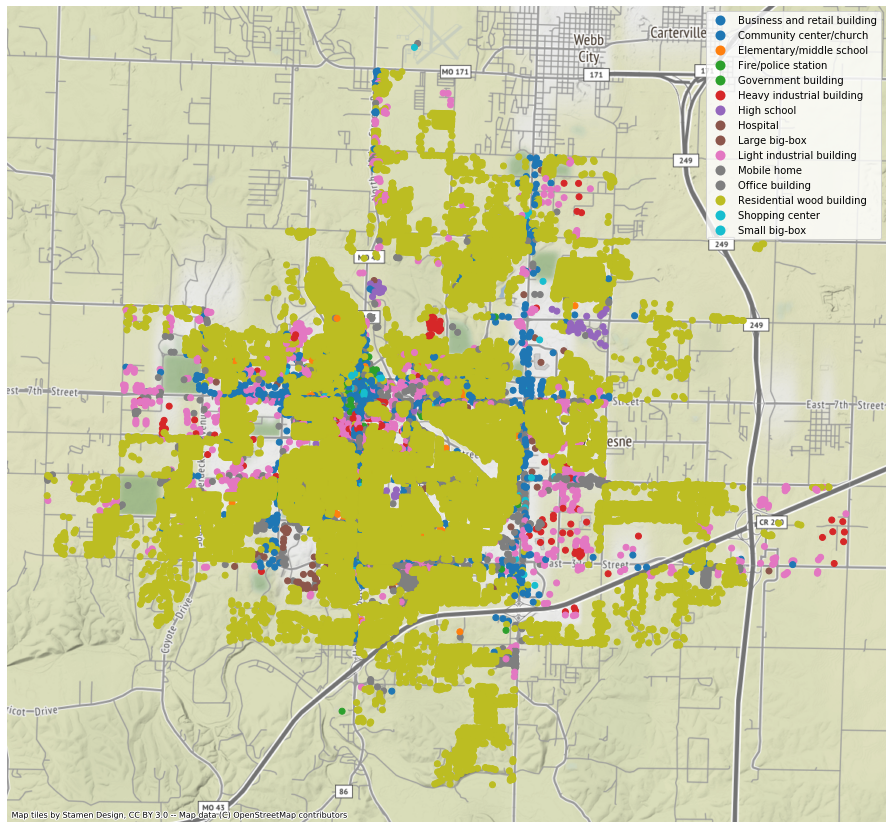

In [16]:
path = PureWindowsPath('joplin_bldg_inventory_v6_LW\joplin_bldg_inventory_v6.shp')
shp_path = Path(path)

building = gpd.read_file(shp_path)  # The layout of the building dataset shown in Python.
building = building.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(17, 15))
building.plot(column='types', categorical=True, legend=True, ax=ax)
ctx.add_basemap(ax)
ax.set_axis_off()

plt.show()

#### 1(c). Fragility Curves

The fragility curves of these 19 building types in the four damage states are shown below, which almost cover the whole range of wind speeds associated with tornados. (Attary et al. 2018, Memari et al. 2018)

In [ ]:
img_DS1 = mpimg.imread('Images/DS1.png')  # Damage State 1
plt.rcParams['figure.figsize'] = [8, 6]
plt.axis('off')
plt.imshow(img_DS1)

In [ ]:
img_DS2 = mpimg.imread('Images/DS2.png')  # Damage State 2
plt.rcParams['figure.figsize'] = [8, 6]
plt.axis('off')
plt.imshow(img_DS2)

In [ ]:
img_DS3 = mpimg.imread('Images/DS3.png')  # Damage State 3
plt.rcParams['figure.figsize'] = [8, 6]
plt.axis('off')
plt.imshow(img_DS3)

In [ ]:
img_DS4 = mpimg.imread('Images/DS4.png')  # Damage State 4
plt.rcParams['figure.figsize'] = [8, 6]
plt.axis('off')
plt.imshow(img_DS4)

### 2. Infrastructure Damage Analysis

The models in this section implement the hindcast of community-level damage to the buildings and Electric Power Network (EPN) for the 2011 Joplin tornado.

In [ ]:
from pyincore import IncoreClient  
client = IncoreClient()  # The authentication service validates username/password and  
                         # approves users to access to other services.

#### 2(a). Buildings Damage

In [ ]:
from pyincore.analyses.buildingdamage import BuildingDamage  # Import building damage module integrated into Pyincore.

In [ ]:
bldg_dmg = BuildingDamage(client)  

hazard_type = "tornado"
hazard_id = "5d07cbeab9219c065b080930"  # The simulated EF-5 tornado shows geographical locations and the range
                                        # of wind speed of tornado hazard in Joplin.

mapping_id = "5d8942dfb9219c068ea795ea"  # Create a mapping to assign tornado fragilities to 19 building archetypes.

bldg_dataset_id = "5d4c61a2b9219c0689a397c9"  # Load the Joplin building dataset, which is a package of GIS files.

bldg_dmg.load_remote_input_dataset("buildings", bldg_dataset_id)  

In [ ]:
result_name = "Joplin_bldg_dmg_result"  
bldg_dmg.set_parameter("result_name", result_name)
bldg_dmg.set_parameter("mapping_id", mapping_id)
bldg_dmg.set_parameter("hazard_type", hazard_type)
bldg_dmg.set_parameter("hazard_id", hazard_id)
bldg_dmg.set_parameter("num_cpu", 4)  # Define the result name, etc., and choose the number of CPU locally 
                                      # to run the model parallelly.

In [ ]:
bldg_dmg.run_analysis()  # Run the building damage module to get building damage results for Joplin in a .csv file format. 
                         # The building damage results herein are referred to fragilities at three damage states (moderate, 
                         # heavy, complete) for 28152 buildings located in Joplin that fall within the tornado path or not.

#### 2(b). Electrical Power Facility - Substations Damage

In [ ]:
from pyincore.analyses.epfdamage.epfdamage import EpfDamage # Import epf damage module integrated into Pyincore.

In [ ]:
hazard_type = "tornado"
hazard_id = "5d07cbeab9219c065b080930"  # The simulated EF-5 tornado shows geographical locations and the range
                                        # of wind speed of tornado hazard in Joplin.
epf_substations_id = "5d92355bb9219c06ae7e386a"  

mapping_id = "5d8a326fb9219c068ea798e7"  # Create a mapping to assign tornado fragilities to substations.

epf_dmg = EpfDamage(client)  

epf_dmg.load_remote_input_dataset("epfs", epf_substations_id) 
                               # Load the Joplin substations dataset, which is a package of GIS files.

In [ ]:
result_name = "Joplin_epf_substations_dmg_result"
epf_dmg.set_parameter("result_name", result_name)
epf_dmg.set_parameter("mapping_id", mapping_id)
epf_dmg.set_parameter("hazard_type", hazard_type)
epf_dmg.set_parameter("hazard_id", hazard_id)
epf_dmg.set_parameter("num_cpu", 1)
epf_dmg.set_parameter("fragility_key", "substations")  # Define the result name, etc., and choose the number
                                                       # of CPU locally to run the model parallelly.

In [ ]:
epf_dmg.run_analysis()  # Run the EPF damage module to get substations damage results for Joplin in a .csv file format. The 
                        # substations damage results herein are referred to fragilities at four damage states (insignificant, 
                        # moderate, extensive, complete) for 18 substations located in Joplin that fall within the tornado 
                        # path or not.

#### 2(c). Electrical Power Facility - Poles Damage

In [ ]:
hazard_type = "tornado"
hazard_id = "5d07cbeab9219c065b080930"  # The simulated EF-5 tornado shows geographical locations and the range
                                        # of wind speed of tornado hazard in Joplin.
epf_poles_id = "5d923daab9219c06ae84afb0"  # Load the Joplin poles dataset, which is a package of GIS files.

mapping_id = "5d8a326fb9219c068ea798e7"  # Create a mapping to assign tornado fragilities to poles.

epf_dmg = EpfDamage(client) 

epf_dmg.load_remote_input_dataset("epfs", epf_poles_id)

In [ ]:
result_name = "Joplin_epf_poles_dmg_result"
epf_dmg.set_parameter("result_name", result_name)
epf_dmg.set_parameter("mapping_id", mapping_id)
epf_dmg.set_parameter("hazard_type", hazard_type)
epf_dmg.set_parameter("hazard_id", hazard_id)
epf_dmg.set_parameter("num_cpu", 4)
epf_dmg.set_parameter("fragility_key", "poles")  # Define the result name, etc., and choose the number
                                                 # of CPU locally to run the model parallelly.

In [ ]:
epf_dmg.run_analysis()  # Run the EPF damage module to get poles damage results for Joplin in a .csv file format. The poles 
                        # damage results herein are referred to fragilities at four damage states (insignificant, moderate, 
                        # extensive, complete) for 23857 poles located in Joplin that fall within the tornado path or not.

### 3. Monte Carlo Simulation

Researchers use Monte Carlo Simulation with 500 iterations as an example to determine the failure probability of buildings reaching damage state 2, damage state 3, and damage state 4. Users can run 10000 samples or even more for brutal-force Monte Carlo Simulation to determine more accurate results of building failure probabilities.

#### 3(a). Building Failure Probability

In [ ]:
from pyincore.analyses.montecarlofailureprobability import MonteCarloFailureProbability 
                                                  # Import Monte Carlo failure probability module integrated into Pyincore.

In [ ]:
mc = MonteCarloFailureProbability(client)
mc.load_remote_input_dataset("damage", "5dbc9525b9219c06dd282637")  
                              #  Load the Joplin building damage results dataset generated from the previous model as an input.

In [ ]:
mc.set_parameter("result_name", "tornado_mc_failure_probability_buildings")
mc.set_parameter("num_cpu", 4)
mc.set_parameter("num_samples", 500)
mc.set_parameter("damage_interval_keys",                   # Define the damage states and failure states individually.
                 ["insignific", "moderate", "heavy", "complete"])
mc.set_parameter("failure_state_keys", ["complete", "heavy", "moderate"]) 

In [ ]:
mc.run_analysis()  # Run the Monte Carlo Simulation module to obtain the building failure probabilities. The building failure
                   # probabilities herein only consider the physical damage without the interdependency.

#### 3(b). Building Damage Spatial Distribution Results

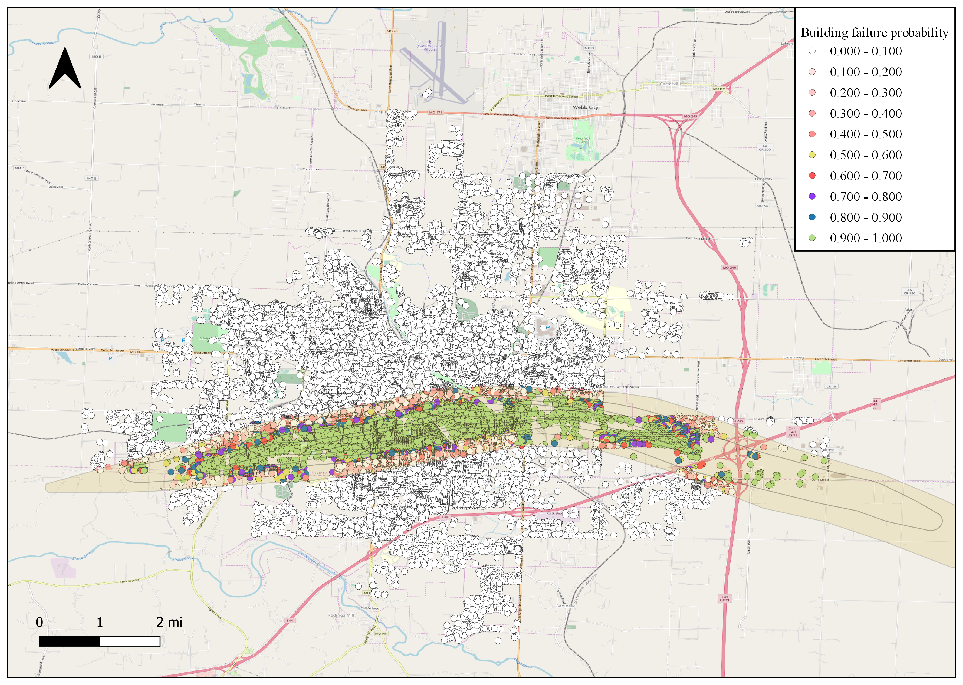

In [21]:
img = mpimg.imread('Images/Building damage spatial results.png') 
plt.rcParams['figure.figsize'] = [17, 15]  
plt.axis('off')
plt.imshow(img)   # The layout of the building damage spatial distribution results shown in GIS software.

C:\Users\lisawang\.conda\envs\pyincoreEnv\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


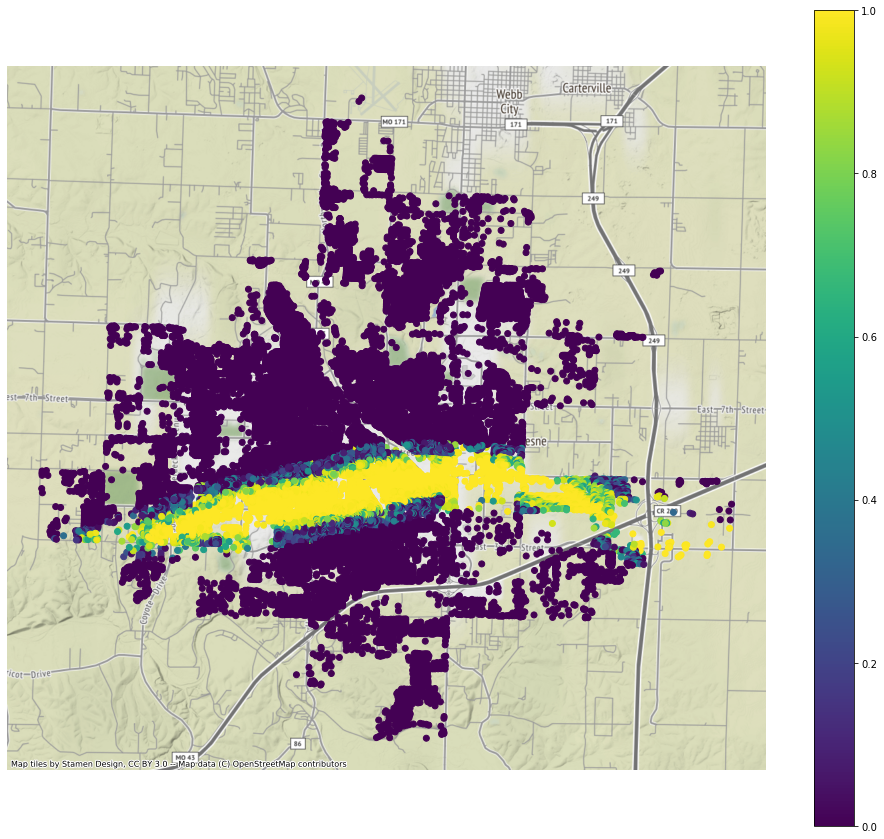

In [19]:
shp_path = r'joplin_bldg_inventory_v6_LW\joplin_bldg_inventory_v6.shp'
blgs = gpd.read_file(shp_path)
blgs = blgs.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(17, 15))
blgs.plot(column='failure',legend='True',ax=ax)
ctx.add_basemap(ax)
ax.set_axis_off()

plt.show()   # The layout of the building damage spatial distribution results shown in Python.

### 4. Infrastructure Functionality Analysis

The functionality analysis module right now can be used to calculate building functionality probabilities considering two situations: buildings are in damage and buildings that are not damaged but lose electric power. Whether buildings can receive electrical power is assumed to depend on the interdependency between buildings and substations, between buildings and poles. If both the nearest pole to the building and the substation where buildings belong to its service area are functional, buildings are considered to be able to receive electric power.

#### 4(a). Building Functionality Probability

In [ ]:
from pyincore.analyses.buildingfunctionality.buildingfunctionality import BuildingFunctionality
                                            # Import building functionality module integrated into Pyincore.

In [ ]:
bldg_func = BuildingFunctionality(client)
bldg_func.load_remote_input_dataset("building_damage_mcs_samples", "5ddc40dfb9219c06d4e28b71")
bldg_func.load_remote_input_dataset("substations_damage_mcs_samples", "5ddc4255b9219c06d4e38a47")
bldg_func.load_remote_input_dataset("poles_damage_mcs_samples", "5ddc42cdb9219c06d4e488e9")
   # Load the datasets of building samples, substation samples, and pole samples. All of the samples are randomly generated
   # using the Monte Carlo Simulation module introduced in the previous section.

In [ ]:
bldg_func.load_remote_input_dataset("interdependency_dictionary", "5dcf4a34b9219ca5e4118312")  
   # Load the datasets of the interdependency table between buildings and substations, and between buildings and poles.

In [ ]:
bldg_func.set_parameter("result_name", "Joplin_mcs_functionality_probability")
bldg_func.set_parameter("num_samples", 500)   # Define the result name, and choose the number 
                                         # of CPU locally to run the model parallelly.

In [ ]:
bldg_func.run_analysis()  # Run the module to obtain the building functionality probabilities. 

#### 4(b). Building Functionality Spatial Distribution Results

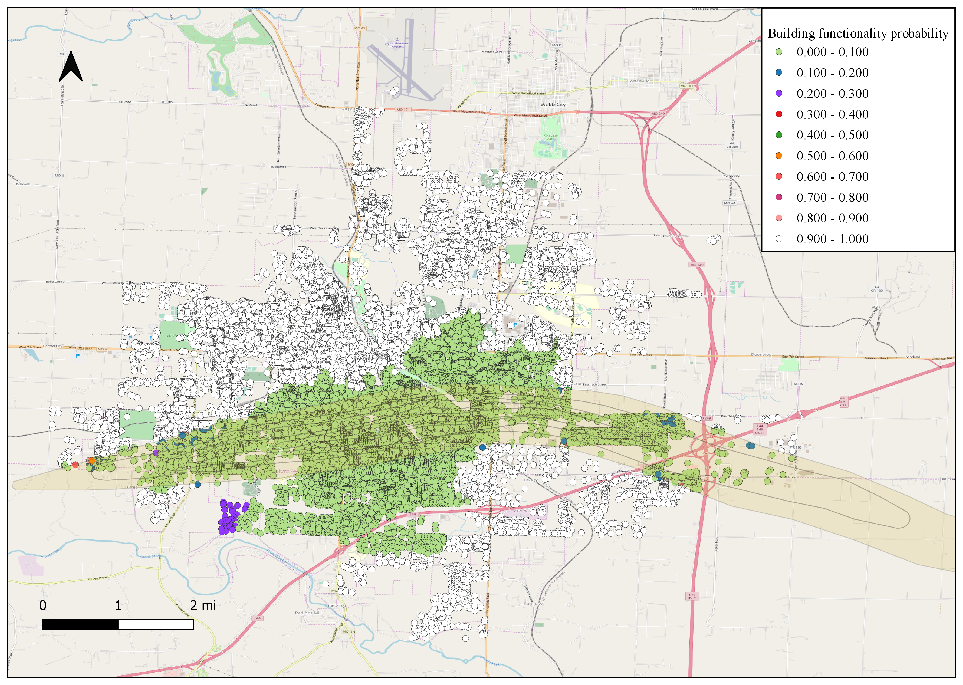

In [30]:
img = mpimg.imread('Images/Building functionality spatial results.png')
plt.rcParams['figure.figsize'] = [17, 15]
plt.axis('off')
plt.imshow(img)   # The layout of the building functionality spatial distribution results shown in GIS software.

C:\Users\lisawang\.conda\envs\pyincoreEnv\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


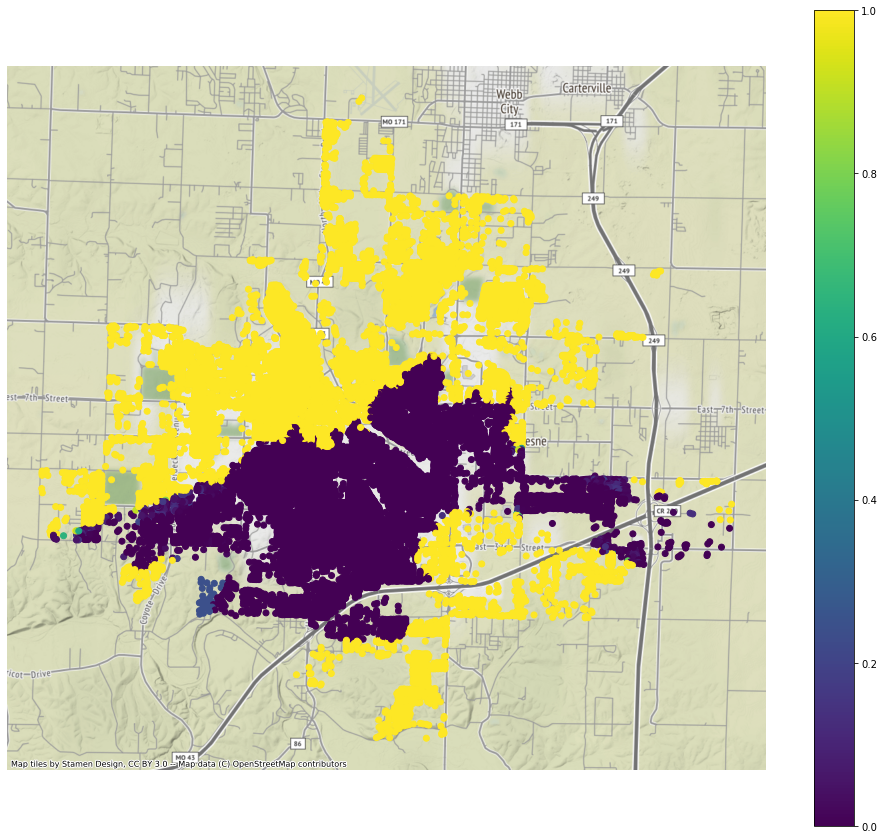

In [20]:
shp_path = r'joplin_bldg_inventory_v6_LW\joplin_bldg_inventory_v6.shp'
blgs = gpd.read_file(shp_path)
blgs = blgs.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(17, 15))
blgs.plot(column='fun',legend='True',ax=ax)
ctx.add_basemap(ax)
ax.set_axis_off()

plt.show()   # The layout of the building functionality spatial distribution results shown in Python.

#### 4(c). Physical Service Resilience Metrics

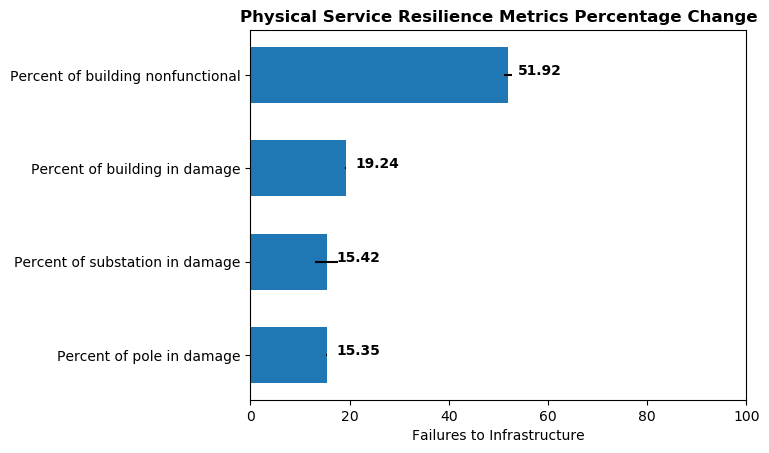

In [32]:
ps = pd.read_csv('Results/physical-service.csv') 
plt.rcdefaults()
fig, ax = plt.subplots()

infra = ('Percent of building nonfunctional', 'Percent of building in damage', 'Percent of substation in damage',\
         'Percent of pole in damage')
y_pos = np.arange(len(infra))
performance = ps['percentage']

for i, v in enumerate(round(performance,2)):
    ax.text(v + 2, i, str(v), color='black', fontweight='bold')
    
ax.barh(y_pos, performance, xerr=ps['std'], align='center', height=0.6)
ax.set_yticks(y_pos)
ax.set_yticklabels(infra)
ax.invert_yaxis()
ax.set_xlabel('Failures to Infrastructure')
ax.set_title('Physical Service Resilience Metrics Percentage Change',fontsize = 12,weight='bold')
plt.xlim(0, 100)
plt.show()  # Physical service resilience metrics percentage change immediately after the simulated EF-5 tornado.

### 5. Economic analysis

#### 5(a). Computable General Equilibrium (CGE) Model

A computable general equilibrium (CGE) model is based on fundamental economic principles. A CGE model uses multiple data sources to reflect the interactions of households, firms and relevant government entities as they contribute to economic activity. The model is based on (1) utility-maximizing households that supply labor and capital, using the proceeds to pay for goods and services (both locally produced and imported) and taxes; (2) the production sector, with perfectly competitive, profit-maximizing firms using intermediate inputs, capital, land and labor to produce goods and services for both domestic consumption and export; (3) the government sector that collects taxes and uses tax revenues in order to finance the provision of public services; and (4) the rest of the world.

In [ ]:
from pyincore.analyses.joplincgeanalysis import JoplinCGEModel

In [ ]:
joplin_cge = JoplinCGEModel(client)

Each of the objects with string IDs below refer to datasets used as inputs in the CGE model.

In [ ]:
# SAM
# Social accounting matrix (SAM) contains data for firms, households and government which are organized 
# in a way to represent the interactions of all three entities in a typical economy
SAM = "5dd85ae7b9219c06d4da8de4"

# CAPITAL COMP
# BB is a matrix which describes how investment in physical infrastructure is transformed into functioning capital such as commercial and residential buildings. 
# These data are collected from the Bureau of Economic Analysis (BEA).
BB = "5dc1e620b9219c06dd2f473a"

# MISC TABLES
IOUT = "5dc1e6d8b9219c06dd2f475e"  # This is matrix that describes the transfer of tax revenue collected by the local government to help finance local government expenditures. 
MISC = "5dc1e736b9219c06dd2f4782"  # This is the name of a file that contains data for commercial sector employment and physical capital. It also contains data for the number of households and working households in the economy. 
MISCH = "5dc1e7b5b9219c06dd2f47a6"  # A file that contains elasticities for the supply of labor with respect to paying income taxes.
LANDCAP = "5dc1e810b9219c06dd2f47ca"  # Contains information regarding elasticity values for the response of changes in the price of physical capital with respect to the supply of investment.
EMPLOY = "5dc1e85ab9219c06dd2f47ee"  # Table name containing data for commercial sector employment.
IGTD = "5dc1e895b9219c06dd2f4812"  # This variable represents a matrix describing the transfer of taxes collected to a variable which permits governments to spend the tax revenue on workers and intermediate inputs.
TAUFF = "5dc1e8eeb9219c06dd2f4836"  # Represents social security tax rates
TPC = "5dc1e924b9219c06dd2f485a"  # Extraneous variable that should be removed from the program
JOBCR = "5dc1e962b9219c06dd2f487e"  # This is a matrix describing the supply of workers coming from each household group in the economy. 
OUTCR = "5dc1e9aeb9219c06dd2f48bc"  # This a matrix describing the number of workers who live in Joplin but commute outside of town to work.

In [ ]:
# Set analysis input datasets
joplin_cge.load_remote_input_dataset("SAM", SAM)
joplin_cge.load_remote_input_dataset("BB", BB)
joplin_cge.load_remote_input_dataset("IOUT", IOUT)
joplin_cge.load_remote_input_dataset("MISC", MISC)
joplin_cge.load_remote_input_dataset("MISCH", MISCH)
joplin_cge.load_remote_input_dataset("LANDCAP", LANDCAP)
joplin_cge.load_remote_input_dataset("EMPLOY", EMPLOY)
joplin_cge.load_remote_input_dataset("IGTD", IGTD)
joplin_cge.load_remote_input_dataset("TAUFF", TAUFF)
joplin_cge.load_remote_input_dataset("TPC", TPC)
joplin_cge.load_remote_input_dataset("JOBCR", JOBCR)
joplin_cge.load_remote_input_dataset("OUTCR", OUTCR)

To know what path to put in "solver_path":
* on **Mac**: open a terminal window, activate your conda environment and type "which ipopt". Paste the resulting path below.
* on **Windows**: open a command terminal, activate your conda environment and type "whereipopt". Paste the resulting path below.

In [ ]:
# Set analysis parameters
joplin_cge.set_parameter("solver_path", "C:/Users/lisawang/.conda/envs/pyincore/Library/bin/ipopt.exe")
joplin_cge.set_parameter("model_iterations", 1)

In [ ]:
# Run Joplin CGE model analysis
joplin_cge.run_analysis()

#### 5(b). Economic Resilience Metrics

##### *Percent Reduction of  Domestic Supply*

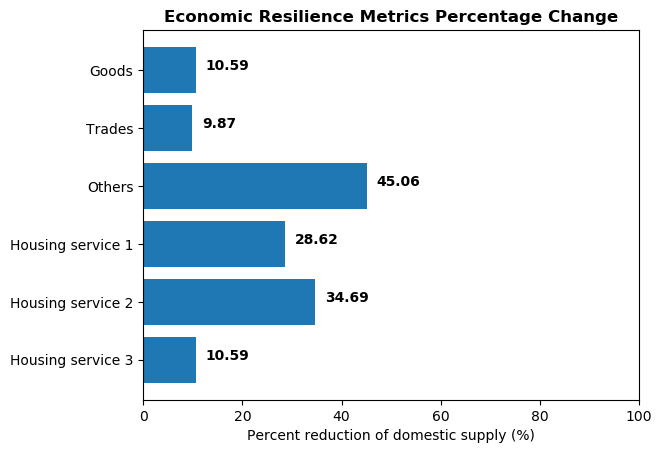

In [5]:
ds = pd.read_csv('Results/domestic-supply.csv')
plt.rcdefaults()
fig, ax = plt.subplots()

sectors = ('Goods', 'Trades', 'Others', 'Housing service 1', 'Housing service 2','Housing service 3')
y_pos = np.arange(len(sectors))
performance = ds['percentage']

for i, v in enumerate(round(performance,2)):
    ax.text(v + 2, i, str(v), color='black', fontweight='bold')
    
ax.barh(y_pos, performance, align='center', height=0.8)
ax.set_yticks(y_pos)
ax.set_yticklabels(sectors)
ax.invert_yaxis()
ax.set_xlabel('Percent reduction of domestic supply (%)')
ax.set_title('Economic Resilience Metrics Percentage Change',fontsize = 12,weight='bold')
plt.xlim(0, 100)
plt.show()

##### *Percent Reduction of  Household Income*

In [ ]:
hi = pd.read_csv('Results/household-income.csv')
plt.rcdefaults()
fig, ax = plt.subplots()

household = ('HH1 (less than $15,000)', 'HH2 ($15,000 to 24,999)', 'HH3 ($25,000 to 74,999)', \
           'HH4 ($75,000 to 99,999)', 'HH5 ($100,000 or more)')
y_pos = np.arange(len(household))
performance = hi['percentage']

for i, v in enumerate(round(performance,1)):
    ax.text(v+0.3, i, str(v), color='black', fontweight='bold')
    
ax.barh(y_pos, performance, align='center', height=0.6)
ax.set_yticks(y_pos)
ax.set_yticklabels(household)
ax.invert_yaxis()
ax.set_xlabel('Percent reduction of household income (%)')
ax.set_title('Economic Resilience Metrics Percentage Change',fontsize = 12,weight='bold')
plt.xlim(0, 10)
plt.show()

##### *Percent Reduction of Employment*

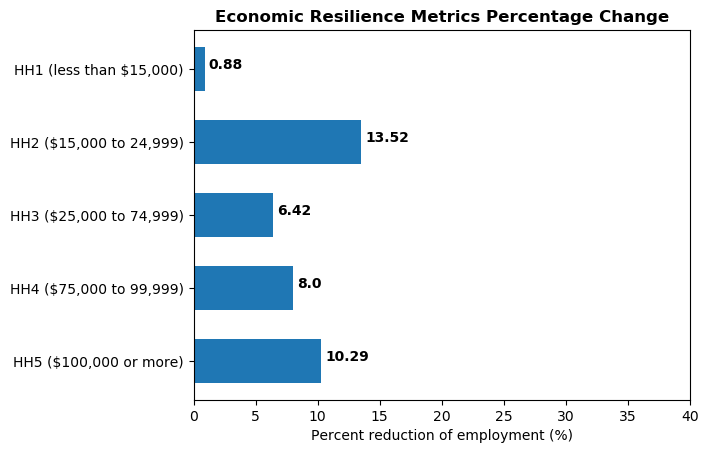

In [6]:
em = pd.read_csv('Results/employment.csv')
plt.rcdefaults()
fig, ax = plt.subplots()

household = ('HH1 (less than $15,000)', 'HH2 ($15,000 to 24,999)', 'HH3 ($25,000 to 74,999)', \
           'HH4 ($75,000 to 99,999)', 'HH5 ($100,000 or more)')
y_pos = np.arange(len(household))
performance = em['percentage']

for i, v in enumerate(round(performance,2)):
    ax.text(v+0.3, i, str(v), color='black', fontweight='bold')
    
ax.barh(y_pos, performance, align='center', height=0.6)
ax.set_yticks(y_pos)
ax.set_yticklabels(household)
ax.invert_yaxis()
ax.set_xlabel('Percent reduction of employment (%)')
ax.set_title('Economic Resilience Metrics Percentage Change',fontsize = 12,weight='bold')
plt.xlim(0, 40)
plt.show()

### 6. Sociological Analysis

This section introduces how social analysis may be integrated with hazard and building damage analysis. In this example the hazard related damage to buildings generates population dislocation. Population dislocation changes the size and distrubution of a community's populatin which alters the demand on infrastructure (Guidotti, Rosenheim, and Gardoni 2019; Rosenheim, Guidotti, Gardoni, and Peacock 2019).

#### 6(a). Population Dislocation Model

The population dislocation model depends first on the allocation of detailed housing unit and household characteristic data to each residential building within the community. The allocation of detailed household characteristic data provides an estimate of the number of people that live within each structure. The dislocation model is based on household surveys, for a more detailed summary of the dislocation model please refer to Rosenheim, Guidotti, Gardoni, and Peacock 2019.

The model predicts which households within the community will be dislocated from their homes immediately following the hazardous event. 

In [ ]:
from pyincore.analyses.populationdislocation import PopulationDislocation, PopulationDislocationUtil

In [ ]:
pop_dis = PopulationDislocation(client)

In [ ]:
building_dmg = "5dbc9525b9219c06dd282637"
housing_unit_alloc = "5dc206f6b9219c06dd2f53e4"
bg_data = "5d4c9545b9219c0689b2358a"

In [ ]:
pop_dis.load_remote_input_dataset("building_dmg", building_dmg)
pop_dis.load_remote_input_dataset("housing_unit_allocation", housing_unit_alloc)
pop_dis.load_remote_input_dataset("block_group_data", bg_data)

In [ ]:
result_name = "pop-dislocation-results"
seed = 1111

pop_dis.set_parameter("result_name", result_name)
pop_dis.set_parameter("seed", seed)

In [ ]:
pop_dis.run_analysis()

####  6(b). Sociological Resilience Metrics

##### *Percent of Population Dislocation*

### 7. References

Attary, N., van de Lindt, J. W., Mahmoud, H., Smith, S., Navarro, C. M., Kim, Y. W., & Lee, J. S. (2018). Hindcasting community-level building damage for the 2011 Joplin EF5 tornado. Natural Hazards, 93(3), 1295-1316.

Attary, N., van de Lindt, J. W., Mahmoud, H., & Smith, S. (2018). Hindcasting Community-Level Damage to the Interdependent Buildings and Electric Power Network after the 2011 Joplin, Missouri, Tornado. Natural Hazards Review, 20(1), 04018027.

Memari, M., Attary, N., Masoomi, H., Mahmoud, H., van de Lindt, J. W., Pilkington, S. F., & Ameri, M. R. (2018). Minimal building fragility portfolio for damage assessment of communities subjected to tornadoes. Journal of Structural Engineering, 144(7), 04018072.

Guidotti, R., Gardoni, P., & Rosenheim, N. (2019). Integration of physical infrastructure and social systems in communities’ reliability and resilience analysis. Reliability Engineering & System Safety, 185, 476-492. https://doi.org/10.1016/j.ress.2019.01.008

Rosenheim, N., Guidotti, R., Gardoni, P., & Peacock, W. (2019). Integration of detailed household and housing unit characteristic data with critical infrastructure for post-hazard resilience modeling. Sustainable and Resilient Infrastructure. https://doi.org/10.1080/23789689.2019.1681821